# 6521603795 Patiphat Aiamram

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('../data/animals.xlsx')
df.head()

,Name,Blood_Temperature,Give_Birth,Can_Fly,Live_In_Water,Have_Legs,Species
0,Human,Warm,Yes,No,No,Yes,Mammals
1,Python,Cold,No,No,No,No,Reptiles
2,Bat,Warm,Yes,Yes,No,Yes,Mammals
3,Frog,Cold,No,No,Sometimes,Yes,Amphibians
4,Salmon,Cold,No,No,Yes,No,Fishes


In [5]:
df['Live_In_Water'].unique()

array(['No', 'Sometimes', 'Yes'], dtype=object)

In [6]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
# ordinal encode column Live_In_Water
order = ['No', 'Sometimes', 'Yes']
OE = OrdinalEncoder(categories= [order])
df['Live_In_Water'] = OE.fit_transform(df[['Live_In_Water']])
df.head()

,Name,Blood_Temperature,Give_Birth,Can_Fly,Live_In_Water,Have_Legs,Species
0,Human,Warm,Yes,No,0.0,Yes,Mammals
1,Python,Cold,No,No,0.0,No,Reptiles
2,Bat,Warm,Yes,Yes,0.0,Yes,Mammals
3,Frog,Cold,No,No,1.0,Yes,Amphibians
4,Salmon,Cold,No,No,2.0,No,Fishes


In [13]:
df['Can_Fly'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
# ordinal encode column Can_Fly
order = ['No', 'Yes']
OE = OrdinalEncoder(categories= [order])
df['Can_Fly'] = OE.fit_transform(df[['Can_Fly']])
df.head()

,Name,Blood_Temperature,Give_Birth,Can_Fly,Live_In_Water,Have_Legs,Species
0,Human,Warm,Yes,0.0,0.0,Yes,Mammals
1,Python,Cold,No,0.0,0.0,No,Reptiles
2,Bat,Warm,Yes,1.0,0.0,Yes,Mammals
3,Frog,Cold,No,0.0,1.0,Yes,Amphibians
4,Salmon,Cold,No,0.0,2.0,No,Fishes


In [15]:
df['Species'].unique()

array(['Mammals', 'Reptiles', 'Amphibians', 'Fishes', 'Birds'],
      dtype=object)

In [16]:
from sklearn.preprocessing import OneHotEncoder

In [17]:
# one hot encode column Species
OHE = OneHotEncoder(handle_unknown='ignore',
                    sparse_output=False,
                   ).set_output(transform='pandas')
OHE_df = OHE.fit_transform(df[['Species']])

In [18]:
OHE_df.head()

,Species_Amphibians,Species_Birds,Species_Fishes,Species_Mammals,Species_Reptiles
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [20]:
df2 = pd.concat( [df,OHE_df], axis=1 )
df2.head()

,Name,Blood_Temperature,Give_Birth,Can_Fly,Live_In_Water,Have_Legs,Species,Species_Amphibians,Species_Birds,Species_Fishes,Species_Mammals,Species_Reptiles
0,Human,Warm,Yes,0.0,0.0,Yes,Mammals,0.0,0.0,0.0,1.0,0.0
1,Python,Cold,No,0.0,0.0,No,Reptiles,0.0,0.0,0.0,0.0,1.0
2,Bat,Warm,Yes,1.0,0.0,Yes,Mammals,0.0,0.0,0.0,1.0,0.0
3,Frog,Cold,No,0.0,1.0,Yes,Amphibians,1.0,0.0,0.0,0.0,0.0
4,Salmon,Cold,No,0.0,2.0,No,Fishes,0.0,0.0,1.0,0.0,0.0


In [23]:
data = pd.read_csv('../data/Superstore.csv', encoding='iso-8859-1')
data.head()

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,Darrin Van Huff,Corporate,12,6,2016,Second Class,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
# z = (x-xb)/sd

In [ ]:
'''
IQR = Interquartile Range
Q1 = 0.25
Q3 = 0.75
IQR = Q3-Q1

'''

In [25]:
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1

In [26]:
IQR

192.66

In [27]:
lwr_bound = Q1 - IQR * (1.5)
upr_bound = Q3 + IQR * (1.5)

In [28]:
data_no_sale_outlier = data[ (data['Sales'] >= lwr_bound) & (data['Sales'] <= upr_bound) ]
data_no_sale_outlier.head()

,Order ID,Customer Name,Segment,Day,Month,Year,Ship Mode,City,State,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,Claire Gute,Consumer,8,11,2016,Second Class,Henderson,Kentucky,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
2,CA-2016-138688,Darrin Van Huff,Corporate,12,6,2016,Second Class,Los Angeles,California,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,US-2015-108966,Sean O'Donnell,Consumer,11,10,2015,Standard Class,Fort Lauderdale,Florida,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,CA-2014-115812,Brosina Hoffman,Consumer,9,6,2014,Standard Class,Los Angeles,California,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,CA-2014-115812,Brosina Hoffman,Consumer,9,6,2014,Standard Class,Los Angeles,California,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656


In [29]:
data_no_sale_outlier['Sales'].mean()

92.86485276991051

In [30]:
data['Sales'].mean()

229.85800083049833

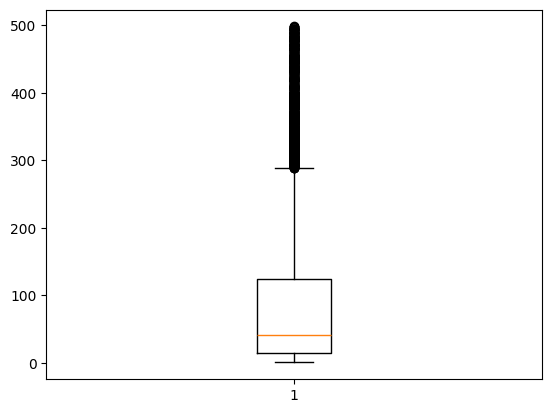

In [32]:
plt.boxplot(data_no_sale_outlier['Sales'])
plt.show()

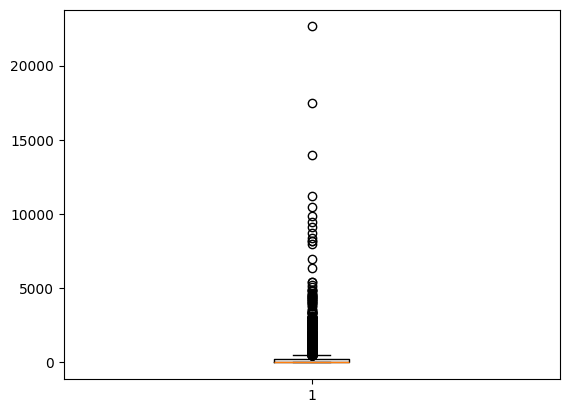

In [33]:
plt.boxplot(data['Sales'])
plt.show()

In [34]:
data_no_sale_outlier['Sales'].max()

498.26